<a href="https://colab.research.google.com/github/Bookmaster9/watlowintern/blob/XGBoost/XGBoostbest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
from google.colab import drive
from xgboost import XGBRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/fullyprocessed.csv')
data.head()
labels = np.array(data["Cycles_until_failure"])
features = np.array(data.iloc[:,:-1])
# Split the data into training and testing sets
# train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features, labels, test_size = 0.2, random_state = 42)
# train_features, test_features, train_labels, test_labels = train_test_split(test_features1, test_labels1, test_size = 0.2, random_state = 42)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Training Features Shape: (1676351, 14)
Training Labels Shape: (1676351,)
Testing Features Shape: (419088, 14)
Testing Labels Shape: (419088,)


In [24]:
# fit model no training data
model = XGBRegressor(objective = 'reg:squarederror', n_estimators = 1000, verbosity = 3, max_depth = 10, reg_alpha = 10, random_state = 42)
model.fit(train_features, train_labels)


[14:53:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1272 extra nodes, 0 pruned nodes, max_depth=10
[14:53:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1316 extra nodes, 0 pruned nodes, max_depth=10
[14:53:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1350 extra nodes, 0 pruned nodes, max_depth=10
[14:54:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1290 extra nodes, 0 pruned nodes, max_depth=10
[14:54:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1294 extra nodes, 0 pruned nodes, max_depth=10
[14:54:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1388 extra nodes, 0 pruned nodes, max_depth=10
[14:54:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1324 extra nodes, 0 pruned nodes, max_depth=10
[14:54:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 

XGBRegressor(max_depth=10, n_estimators=1000, objective='reg:squarederror',
             random_state=42, reg_alpha=10, verbosity=3)

In [28]:
import pickle
pickle.dump(model, open('/content/gdrive/MyDrive/thirdxgboost.pkl', 'wb'))

In [26]:
# make predictions for test data
y_pred = model.predict(test_features)
count = 0
for i in range(len(test_labels)):
  if y_pred[i]> (test_labels[i] - 1000) and y_pred[i] < (test_labels[i] +1000):
    count +=1
print(count/len(test_labels))

0.7782327339365479


In [27]:
a = pd.DataFrame()
a['test_labels'] = test_labels
a['pred_labels'] = y_pred
a.to_csv('/content/gdrive/MyDrive/bestxgboost1.csv')

In [29]:
from sklearn.metrics import r2_score

print(r2_score(test_labels,y_pred))


0.9847351643583526


In [19]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

[14:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


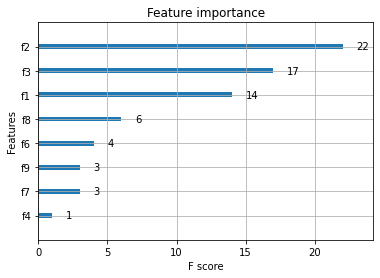

In [20]:
import xgboost as xgb 
data_dmatrix = xgb.DMatrix(data=train_features,label=train_labels) 

params = {"objective":"reg:linear",'colsample_bytree': 1,'learning_rate': 0.1,'max_depth': 3} 
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123) 
cv_results.head()

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10) 

import matplotlib.pyplot as plt 

xgb.plot_importance(xg_reg) 

plt.rcParams['figure.figsize'] = [5, 5] 

plt.show()